# Machine Learning Lab 02b

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Step 1: Read the dataset
df = pd.read_csv('LabTask2b_Regress_ChanceofAdmit.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


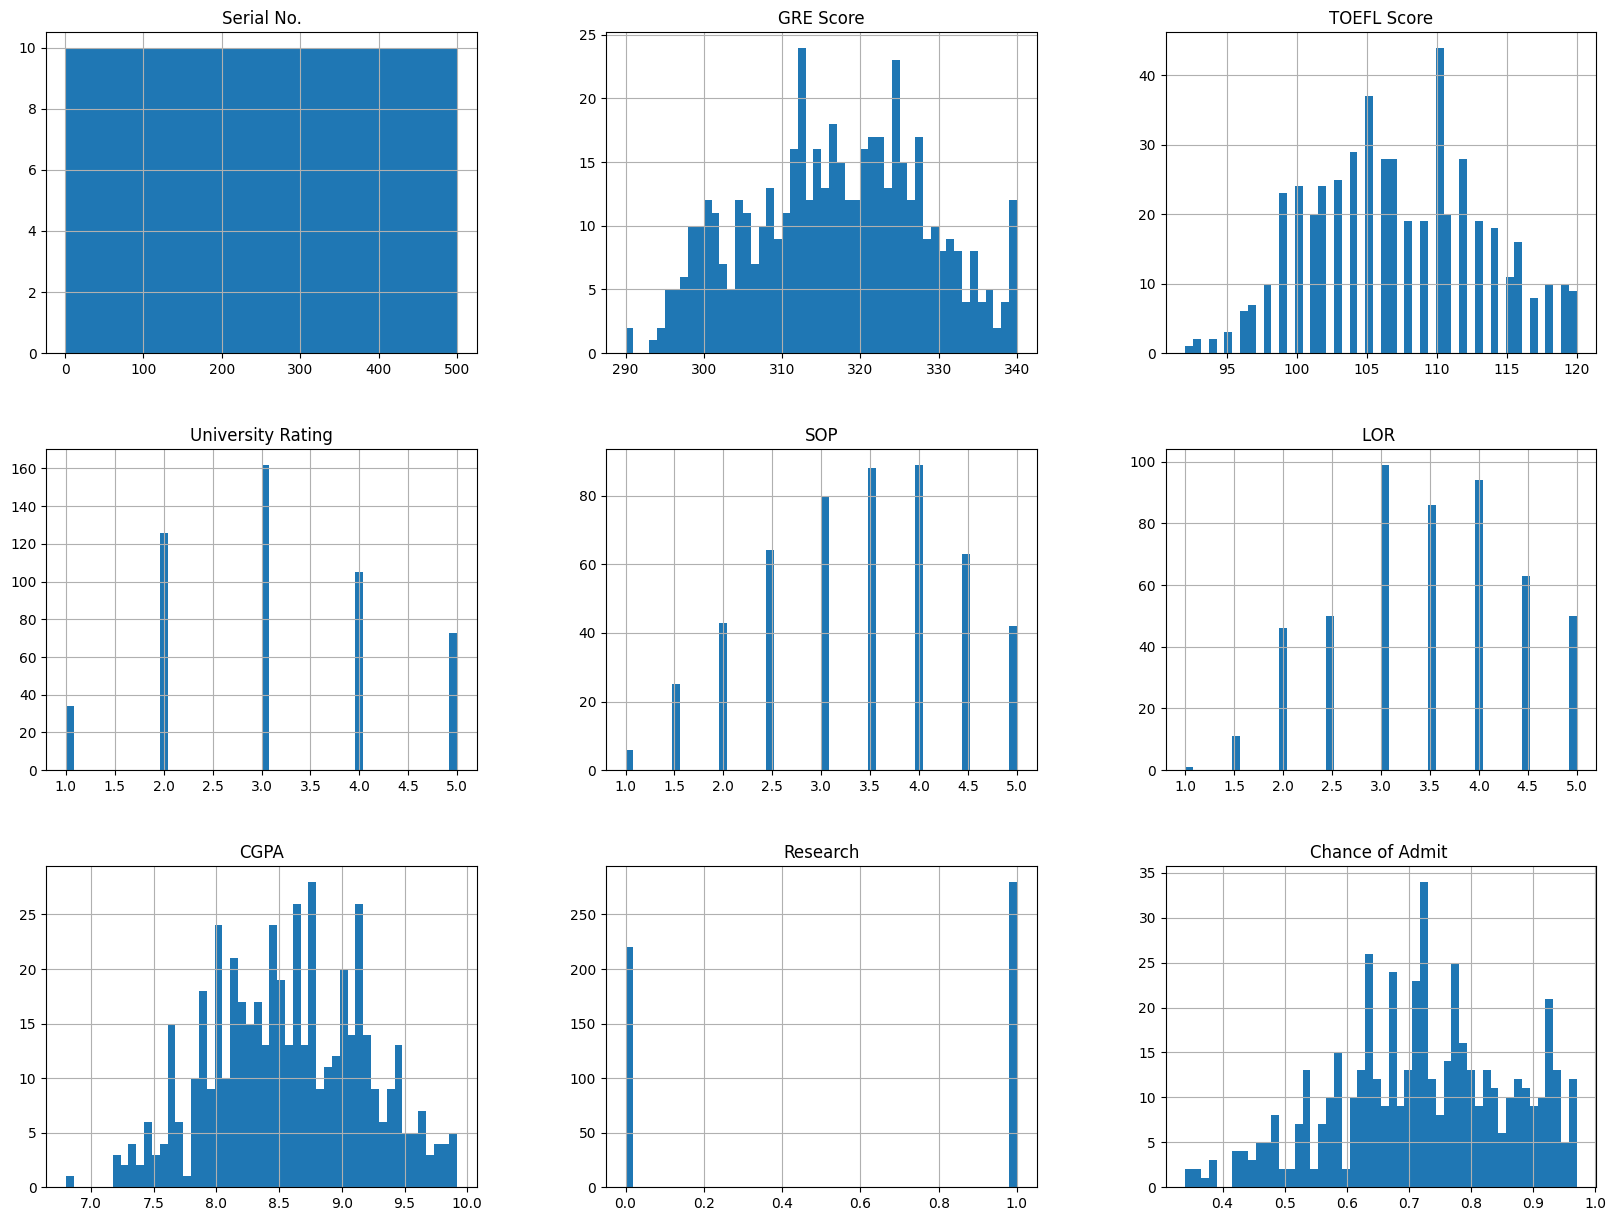

In [18]:
# Step 2: Perform exploratory data analysis (EDA) and visualize the data
df.info()
df.describe()
df.isnull().sum()
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [20]:
# Step 2: Perform required pre-processing
# Handle missing values, encode categorical variables, etc.
df = df.dropna()
# Assuming 'target' is the response variable
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

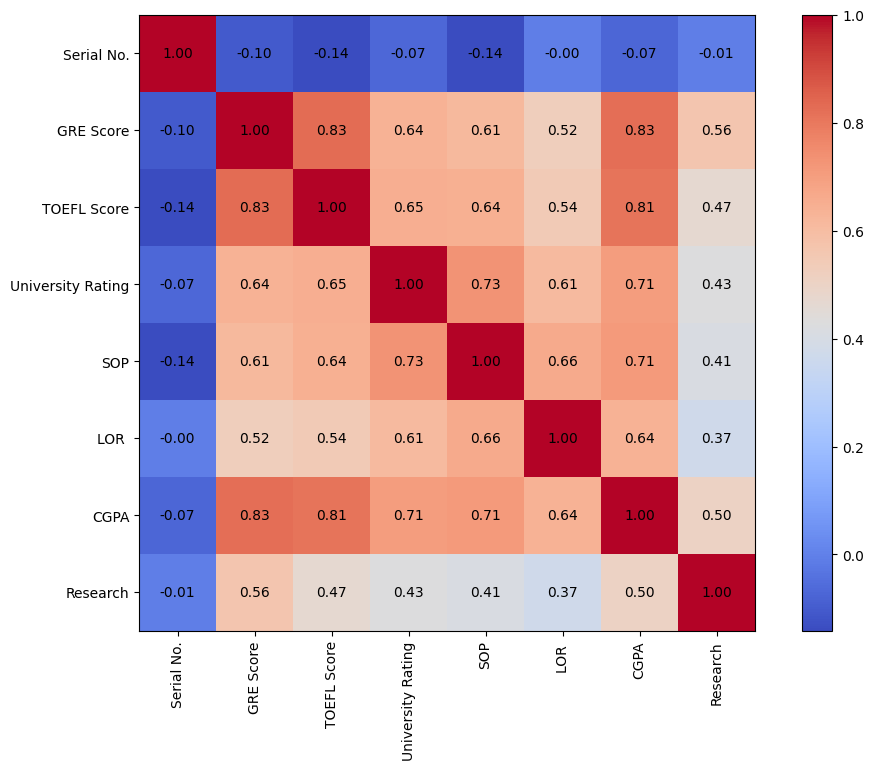

In [25]:
# Step 3: Compute correlation for explanatory variables and display Correlation chart
corr_matrix = X.corr()

plt.figure(figsize=(12, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()

# Adding labels
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# Adding annotations
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

In [26]:
# Step 4: Build different variants of ML Regressor models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regressor
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Ridge Regressor
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# Lasso Regressor
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

In [27]:
# Step 5: Interpret the regression coefficients for each explanatory variable
print('Linear Regression Coefficients:', lin_reg.coef_) # These coefficients represent the weights that each feature contributes to predicting the dependent variable.
print('Ridge Regression Coefficients:', ridge_reg.coef_) # Ridge regression adds a penalty term to the loss function to prevent overfitting. This penalty term is the L2 norm of the coefficients.
print('Lasso Regression Coefficients:', lasso_reg.coef_) # Lasso regression adds L1 regularization, which encourages sparsity by forcing some coefficients to become exactly zero.

Linear Regression Coefficients: [8.93807486e-05 2.48131984e-03 3.43532466e-03 2.63327982e-03
 4.23118470e-03 1.49534856e-02 1.09065677e-01 2.22901542e-02]
Ridge Regression Coefficients: [9.00156331e-05 2.56565345e-03 3.51318765e-03 2.82777690e-03
 4.56700304e-03 1.51848212e-02 1.05702339e-01 2.19559133e-02]
Lasso Regression Coefficients: [0.00010134 0.00786636 0.00421204 0.         0.         0.
 0.         0.        ]


Ridge adds a penalty term to prevent overfitting. The smaller coefficients are penalised more than the Larger ones. This increases the influence of the larger coefficients.
Lasso eliminates small coefficients by reducing them to exactly 0. Thus only those coefficients which are "more important" are left, in our case only the first three.

In [28]:
# Step 6: Determine the performance of the model using suitable metrics
def print_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X_test.shape[1]-1)
    print(f'{model_name} - MSE: {mse}, MAE: {mae}, R2: {r2}, Adjusted R2: {adj_r2}')

print_metrics(y_test, y_pred_lin, 'Linear Regression')
print_metrics(y_test, y_pred_ridge, 'Ridge Regression')
print_metrics(y_test, y_pred_lasso, 'Lasso Regression')

Linear Regression - MSE: 0.003551180545098712, MAE: 0.04325885259545284, R2: 0.826348139603975, Adjusted R2: 0.811082041986742
Ridge Regression - MSE: 0.003569904667253685, MAE: 0.04341042188461415, R2: 0.8254325346086218, Adjusted R2: 0.8100859442445445
Lasso Regression - MSE: 0.007278096587802558, MAE: 0.06392212343824859, R2: 0.6441028563421732, Adjusted R2: 0.6128151953612654


In [29]:
# Predict the output for the test data using the best model
# Assuming Ridge Regression is the best model based on metrics
best_model = ridge_reg
y_pred_best = best_model.predict(X_test)
print('Predictions using the best model:', y_pred_best)

Predictions using the best model: [0.92593439 0.77761606 0.5880044  0.69956438 0.80372456 0.87561888
 0.48435027 0.63530191 0.80257342 0.82271411 0.70390139 0.72302027
 0.67310643 0.92366368 0.83357045 0.51839114 0.86249815 0.57213009
 0.53743621 0.58050538 0.68221014 0.57359509 0.72236449 0.80402275
 0.7666045  0.61958895 0.97196921 0.84583747 0.61528918 0.75124173
 0.57854824 0.7403078  0.56667271 0.85266679 0.63510238 0.74372653
 0.56435992 0.94237715 0.63781101 0.69556523 0.98134381 0.55711222
 0.68603962 0.85360882 0.92153913 0.5614964  0.93725766 0.81700896
 0.80938375 0.90596908 0.86965924 0.55616836 0.69359908 0.53871037
 0.94980093 0.58536361 0.94707193 0.72233361 0.65561622 0.48478372
 0.64584465 0.675002   0.60323974 0.62088392 0.42205544 0.57746744
 0.88465434 0.87796127 0.6535391  0.71686734 0.62271597 0.79497062
 0.69045558 0.56979377 0.55396764 0.6572241  0.84988768 0.85045174
 0.55575904 0.64399122 0.76061321 0.8325766  0.64281797 0.83649374
 0.74044538 0.65605689 0.599